In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Direct Comments

First we can see the direct comments (The ID_Posting of the UserPost is the ID_Posting_Parent of UserComment)
E.g at 2019-05-12 'NICE!' directly commented '!SeMteX!'s post

In [73]:
direct_comments = pd.read_csv("../output/direct_comments.csv")
direct_comments.sort_values(["UserPost", "UserComment"])

,UserPost,UserComment,ID_Posting,ID_Posting_Comment,CommentCreatedAt
186483,!SeMteX!,NICE!,1041381340,1041385498,2019-05-12 10:28:06.340
313245,"""Maxmustermann""",WilWil,1041840006,1041841069,2019-05-21 22:29:57.300
313246,"""Maxmustermann""",grauli,1041840006,1041840829,2019-05-21 22:23:14.597
313244,"""Maxmustermann""",rule eleven,1041840006,1041840316,2019-05-21 22:10:14.867
83357,"""Unschuldsvermutung""",held der arbeit klasse II,1041344453,1041344889,2019-05-10 15:39:26.690
...,...,...,...,...,...
18781,Žarko Jankovic,tt88,1041093644,1041094261,2019-05-02 13:02:20.050
3297,Žarko Jankovic,wakman,1041092153,1041092744,2019-05-02 12:14:41.927
19016,Žarko Jankovic,whatever - nevermind,1041095020,1041110668,2019-05-03 00:26:01.497
3296,Žarko Jankovic,ämpersand,1041092153,1041093895,2019-05-02 12:49:23.453


Now we can find some heavy users (having the most days with (direct comments) interaction)

In [74]:
direct_comments["InteractionDate"] = pd.to_datetime(direct_comments["CommentCreatedAt"]).dt.date
count_user_interaction = direct_comments.groupby(["UserPost", "UserComment"])["InteractionDate"].nunique().sort_values(ascending=False)
count_user_interaction

UserPost                              UserComment              
la tricoteuse                         katze77                      26
eine kluge Katze kratzt keinen Köter  Flavio Marconi               26
Resi Tupfer                           ildiko1905                   26
Leider Realist                        humanökologische Pyramide    24
humanökologische Pyramide             Leider Realist               24
                                                                   ..
Kontra                                pu-muckl                      1
                                      privé                         1
                                      pola                          1
                                      ottoli                        1
Žarko Jankovic                        ämpersand                     1
Name: InteractionDate, Length: 401020, dtype: int64

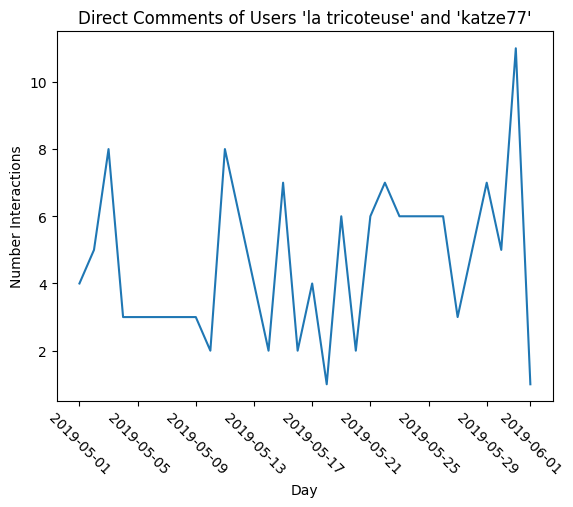

,UserPost,UserComment,ID_Posting,ID_Posting_Comment,CommentCreatedAt,InteractionDate
4758,la tricoteuse,katze77,1041093414,1041097284,2019-05-02 14:47:02.983,2019-05-02
8731,katze77,la tricoteuse,1041074351,1041074597,2019-05-01 18:48:10.480,2019-05-01
11072,la tricoteuse,katze77,1041095720,1041096826,2019-05-02 14:31:11.900,2019-05-02
18408,katze77,la tricoteuse,1041097284,1041097928,2019-05-02 15:09:48.307,2019-05-02
22755,la tricoteuse,katze77,1041097928,1041098302,2019-05-02 15:23:11.183,2019-05-02
...,...,...,...,...,...,...
483075,la tricoteuse,katze77,1042273441,1042273676,2019-05-31 21:20:28.880,2019-05-31
484408,la tricoteuse,katze77,1042270198,1042270799,2019-05-31 19:14:10.883,2019-05-31
484409,la tricoteuse,katze77,1042271184,1042273192,2019-05-31 20:58:07.687,2019-05-31
486094,katze77,la tricoteuse,1042270799,1042271184,2019-05-31 19:29:22.323,2019-05-31


In [75]:
users = count_user_interaction.index[0]
direct_comments_heavy_users = direct_comments[
    ((direct_comments["UserPost"] == users[0]) & (direct_comments["UserComment"] == users[1])) |
    ((direct_comments["UserPost"] == users[1]) & (direct_comments["UserComment"] == users[0]))]

direct_comments_heavy_users.groupby("InteractionDate")["CommentCreatedAt"].count().sort_index().plot()
plt.title("Direct Comments of Users '" + str(users[0]) + "' and '" + str(users[1]) + "'")
plt.xlabel("Day")
plt.ylabel("Number Interactions")
plt.xticks(rotation=-45)
plt.show()

direct_comments_heavy_users

# Votings

Now we can check if users become similar in their voting behaviour. Therefore, we load the output of the scripts for the user_votes.
Here we see the user who posted the post and the user who commented at a certain time. Also we can see if the vote was negative (-1) or positive (+1)

In [76]:
user_votes = pd.read_csv("../output/user_votes.csv")
user_votes["InteractionDate"] = pd.to_datetime(user_votes["VoteCreatedAt"]).dt.date
user_votes

,UserPost,UserVote,VoteCreatedAt,Vote,InteractionDate
0,Heckscheibenwischer,Kopper Stefan,2019-05-06 16:47:46.883,-1,2019-05-06
1,Heinz Fettleber,Kopper Stefan,2019-05-01 22:19:06.240,-1,2019-05-01
2,markvienna,Kopper Stefan,2019-05-01 20:46:16.267,1,2019-05-01
3,Bruce Campbell,Dr. CMAP,2019-05-01 23:54:54.600,1,2019-05-01
4,Erdäpfelsack,Dr. CMAP,2019-05-01 20:59:29.910,1,2019-05-01
...,...,...,...,...,...
3824979,Krugerrand,oswaldsee,2019-05-31 23:36:50.960,1,2019-05-31
3824980,RS69,youming,2019-06-02 00:11:51.430,-1,2019-06-02
3824981,RS69,Dampfschiff St. Nepomuk,2019-06-02 00:07:53.280,-1,2019-06-02
3824982,Georg_Konrad,Pfefferstreuer,2019-06-01 23:01:07.253,1,2019-06-01


Again we can search for heavy voters

In [77]:
count_user_interaction = user_votes.groupby(["UserPost", "UserVote"])["InteractionDate"].nunique().sort_values(ascending=False)
count_user_interaction

UserPost        UserVote      
Trigintipetala  42                31
la tricoteuse   katze77           31
Yudhistira      Helmut Wolff      30
Auguste & Kurt  katze77           30
ildiko1905      Resi Tupfer       30
                                  ..
Löffelmann      Entferner          1
                ErnstDesLebens     1
                Finn McCool        1
                G.P.K.             1
Žarko Jankovic  wakman             1
Name: InteractionDate, Length: 2953362, dtype: int64

E:\nicob\Documents\TUW\2_Semester\Social Network Analysis\Project\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


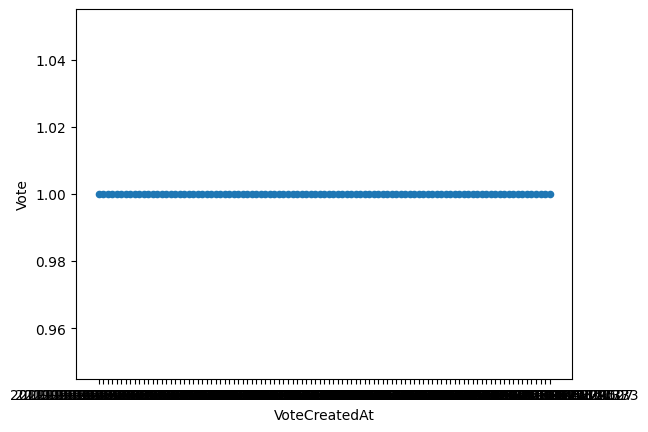

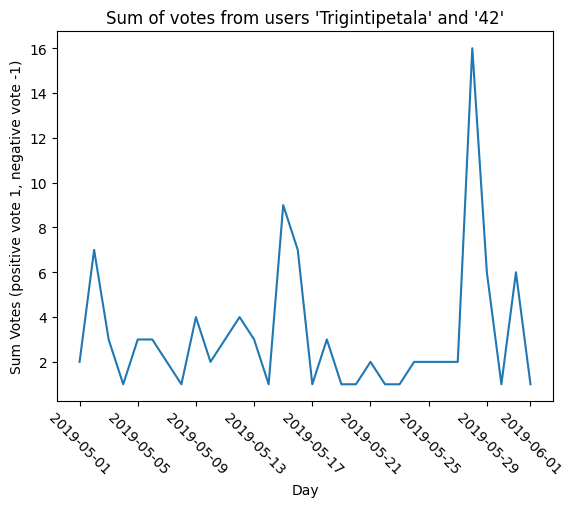

In [78]:
users = count_user_interaction.index[0]


user_votes_heavy_users = user_votes[
    ((user_votes["UserPost"] == users[0]) & (user_votes["UserVote"] == users[1])) |
    ((user_votes["UserPost"] == users[1]) & (user_votes["UserVote"] == users[0]))]

user_votes_heavy_users.sort_values("VoteCreatedAt").plot.scatter(x="VoteCreatedAt", y="Vote")
plt.show()


user_votes_heavy_users.groupby("InteractionDate")["Vote"].sum().sort_index().plot()
plt.title("Sum of votes from users '" + str(users[0]) + "' and '" + str(users[1]) + "'")
plt.xlabel("Day")
plt.ylabel("Sum Votes (positive vote 1, negative vote -1)")
plt.xticks(rotation=-45)
plt.show()